In [1]:
import io
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn
import seaborn as sns
import datetime as dt

from plotly.offline import init_notebook_mode, plot,iplot
import plotly.graph_objs as go
init_notebook_mode(connected=True)
import matplotlib.pyplot as plt
import plotly.tools as tls#visualization
import plotly.figure_factory as ff#visualization

from sklearn.cluster import KMeans,MeanShift
from sklearn import decomposition
from sklearn import metrics
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from tslearn.clustering import TimeSeriesKMeans, KShape, silhouette_score
from tslearn.preprocessing import TimeSeriesScalerMeanVariance

C:\Users\Usuario\anaconda3\lib\site-packages\tslearn\clustering\kmeans.py:16: UserWarning:

Scikit-learn <0.24 will be deprecated in a future release of tslearn



In [2]:
#pip install tslearn

In [2]:
curated_pkl = pd.read_pickle('curated_df_c.pkl')

In [3]:
df=curated_pkl.copy()

In [4]:
df.head()

,id_equipo,nombre_producto,capacidad,volumen,consumo,industria,volumen_escl,consumo_escl
timestamp,,,,,,,,
2021-01-01 00:00:00,477,VP Nafta,15032,865.65,0,Service Station,0.0575871,0
2021-01-01 00:05:00,477,VP Nafta,15032,865.65,0,Service Station,0.0575871,0
2021-01-01 00:10:00,477,VP Nafta,15032,865.65,0,Service Station,0.0575871,0
2021-01-01 00:15:00,477,VP Nafta,15032,865.65,0,Service Station,0.0575871,0
2021-01-01 00:20:00,477,VP Nafta,15032,864.984,0.166504,Service Station,0.0575428,1.10766e-05


In [5]:
df_fil=df.loc[:"2021-01-7"]

In [6]:
df_fil.head()

,id_equipo,nombre_producto,capacidad,volumen,consumo,industria,volumen_escl,consumo_escl
timestamp,,,,,,,,
2021-01-01 00:00:00,477,VP Nafta,15032,865.65,0,Service Station,0.0575871,0
2021-01-01 00:05:00,477,VP Nafta,15032,865.65,0,Service Station,0.0575871,0
2021-01-01 00:10:00,477,VP Nafta,15032,865.65,0,Service Station,0.0575871,0
2021-01-01 00:15:00,477,VP Nafta,15032,865.65,0,Service Station,0.0575871,0
2021-01-01 00:20:00,477,VP Nafta,15032,864.984,0.166504,Service Station,0.0575428,1.10766e-05


In [9]:
#df_fil=df_fil.reset_index()

In [7]:
df_fil.industria.unique()

array(['Service Station', 'Agriculture', 'Transportation', 'Oil&Gas',
       'Unknown', 'Mining', 'Construction', 'Industry', 'Public',
       'Telcos', 'Distributor'], dtype=object)

In [8]:
df_fil.industria.value_counts()

Service Station    78081
Telcos             76596
Transportation     68929
Agriculture        18318
Construction       17192
Oil&Gas            12096
Industry           10080
Unknown             6418
Mining              4032
Public              2653
Distributor          409
Name: industria, dtype: int64

In [9]:
df_fil.id_equipo.unique()

array(['477', '533', '459', '520', '543', '537', '541', '540', '550',
       '551', '553', '554', '569', '578', '593', '595', '600', '618',
       '495', '643', '627', '636', '637', '638', '441', '644', '642',
       '648', '654', '626', '501', '661', '665', '679', '681', '683',
       '686', '682', '680', '687', '696', '697', '717', '715', '725',
       '719', '723', '724', '727', '729', '730', '731', '733', '734',
       '735', '742', '743', '741', '745', '746', '747', '751', '759',
       '677', '769', '771', '783', '841', '799', '801', '806', '800',
       '814', '794', '827', '831', '480', '842', '849', '851', '854',
       '853', '867', '869', '871', '838', '874', '887', '900', '479',
       '484', '453', '486', '515', '531', '159', '248', '227', '299',
       '356', '357', '421', '433', '455', '429', '740', '816', '788',
       '890', '912', '916', '915', '914', '913', '918', '920', '919',
       '431', '220', '629', '828', '896', '508', '922', '925', '921',
       '930', '927',

In [10]:
df_fil.id_equipo.value_counts()[:20]

900    8064
357    8064
495    8064
486    8064
429    8064
799    8064
800    6048
248    6048
159    5796
838    4032
578    4032
724    4032
677    4032
520    4032
874    4032
477    4032
729    2016
681    2016
746    2016
554    2016
Name: id_equipo, dtype: int64

In [11]:
df_fil=df_fil[(df_fil["id_equipo"]=="900")|(df_fil["id_equipo"]=="495")|(df_fil["id_equipo"]=="357")|(df_fil["id_equipo"]=="799")|(df_fil["id_equipo"]=="799")|(df_fil["id_equipo"]=="429")|(df_fil["id_equipo"]=="486")|(df_fil["id_equipo"]=="248")|(df_fil["id_equipo"]=="800")|(df_fil["id_equipo"]=="159")|(df_fil["id_equipo"]=="838")|(df_fil["id_equipo"]=="677")|(df_fil["id_equipo"]=="520")|(df_fil["id_equipo"]=="578")|(df_fil["id_equipo"]=="874")|(df_fil["id_equipo"]=="724")|(df_fil["id_equipo"]=="477")|(df_fil["id_equipo"]=="751")|(df_fil["id_equipo"]=="648")|(df_fil["id_equipo"]=="626")|(df_fil["id_equipo"]=="610")]

In [12]:
len(df_fil)

100548

In [13]:
df_fil.id_equipo.value_counts()

357    8064
486    8064
799    8064
429    8064
495    8064
900    8064
800    6048
248    6048
159    5796
677    4032
724    4032
477    4032
838    4032
578    4032
874    4032
520    4032
648    2016
626    2016
751    2016
Name: id_equipo, dtype: int64

In [91]:
features=df_fil[["capacidad", "volumen", "consumo"]]

In [31]:
features

,capacidad,volumen,consumo
timestamp,,,
2021-01-01 00:00:00,15032,865.65,0
2021-01-01 00:05:00,15032,865.65,0
2021-01-01 00:10:00,15032,865.65,0
2021-01-01 00:15:00,15032,865.65,0
2021-01-01 00:20:00,15032,864.984,0.166504
...,...,...,...
2021-01-07 23:35:00,20000,2218.6,0
2021-01-07 23:40:00,20000,2218.6,0
2021-01-07 23:45:00,20000,2218.6,0


In [15]:
features.columns

Index(['capacidad', 'volumen_escl', 'consumo_escl'], dtype='object')

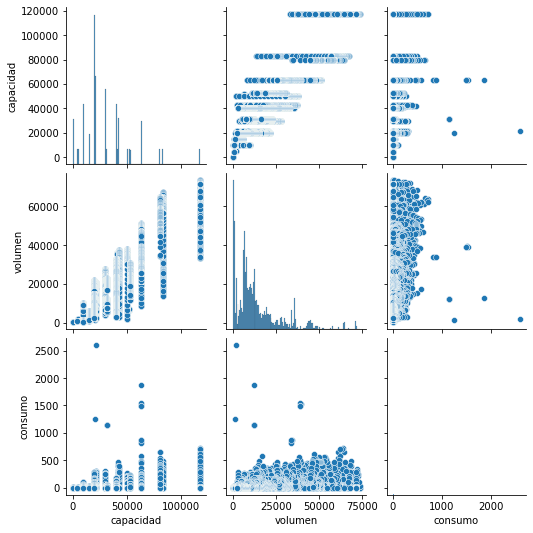

In [38]:
sns_plot=sns.pairplot(features)
sns_plot

In [50]:
scaler = StandardScaler()

In [51]:
features=scaler.fit_transform(features)

In [52]:
features

array([[-0.69071209, -0.95510223, -0.28200101],
       [-0.69071209, -0.95510223, -0.28200101],
       [-0.69071209, -0.95510223, -0.28200101],
       ...,
       [-0.47241916, -0.85792344, -0.28200101],
       [-0.47241916, -0.85792344, -0.28200101],
       [-0.47241916, -0.85792344, -0.28200101]])

In [92]:
#scaler_time=TimeSeriesScalerMeanVariance()

In [93]:
#features=scaler_time.fit_transform(features)

In [94]:
#features

array([[[ 1.41235269],
        [-0.64336784],
        [-0.76898485]],

       [[ 1.41235269],
        [-0.64336784],
        [-0.76898485]],

       [[ 1.41235269],
        [-0.64336784],
        [-0.76898485]],

       ...,

       [[ 1.40695493],
        [-0.57954861],
        [-0.82740632]],

       [[ 1.40695493],
        [-0.57954861],
        [-0.82740632]],

       [[ 1.40695493],
        [-0.57954861],
        [-0.82740632]]])

### Kmeans

Text(0.5, 1.0, 'Inertia of k-Means versus number of clusters')

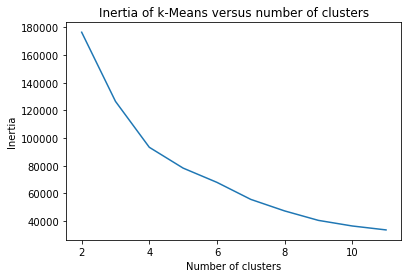

In [53]:
#Prueba: para elegir el hiperparámetro n_clusters, variando de 2 a 11 clusters
scores = [KMeans(n_clusters=i).fit(features).inertia_ for i in range(2,12)]

plt.plot(np.arange(2, 12), scores)
plt.xlabel('Number of clusters')
plt.ylabel("Inertia")
plt.title("Inertia of k-Means versus number of clusters")

Automatically created module for IPython interactive environment
Para n_clusters = 2 El silhouette_score promedio es : 0.5806450925302267
Para n_clusters = 3 El silhouette_score promedio es : 0.578816782249418
Para n_clusters = 4 El silhouette_score promedio es : 0.46775567789985983
Para n_clusters = 5 El silhouette_score promedio es : 0.46387034060926746
Para n_clusters = 6 El silhouette_score promedio es : 0.41593739916102573


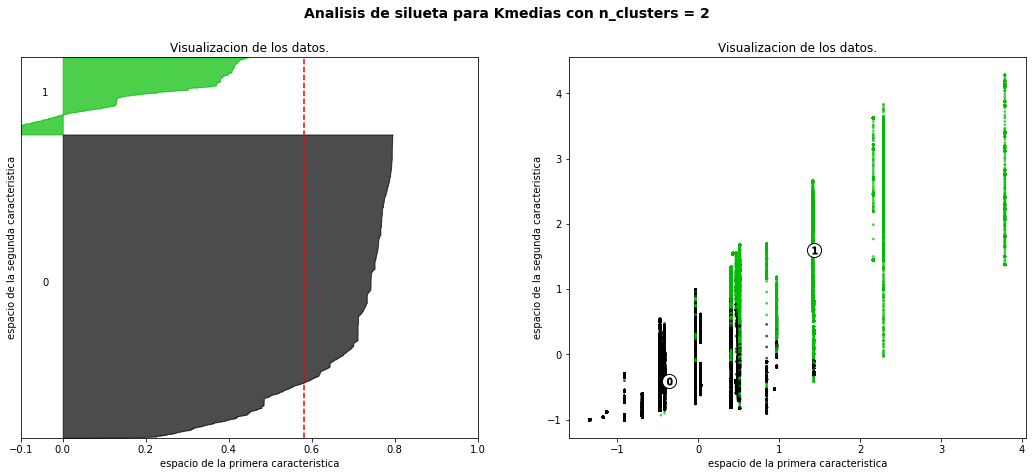

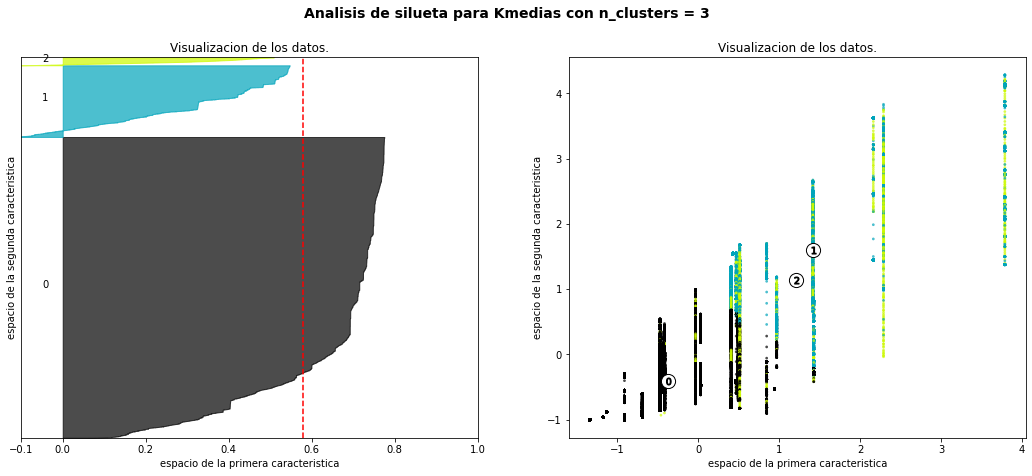

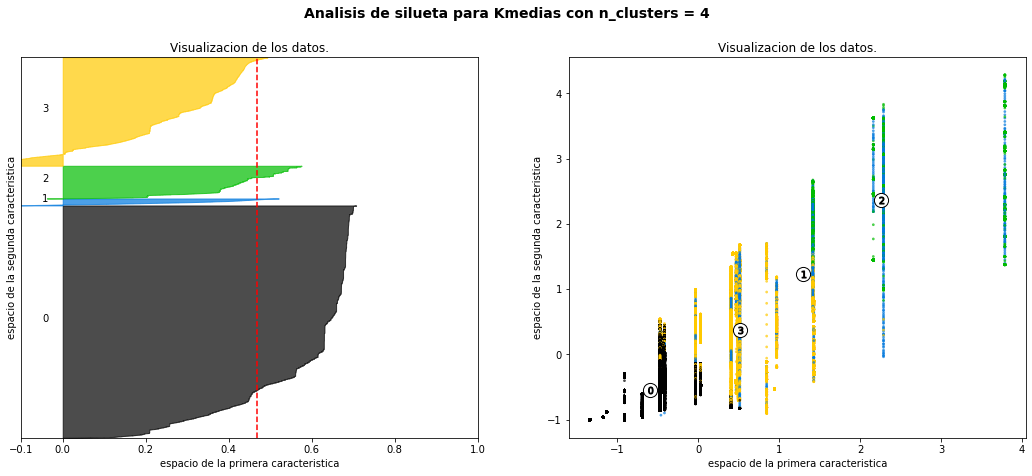

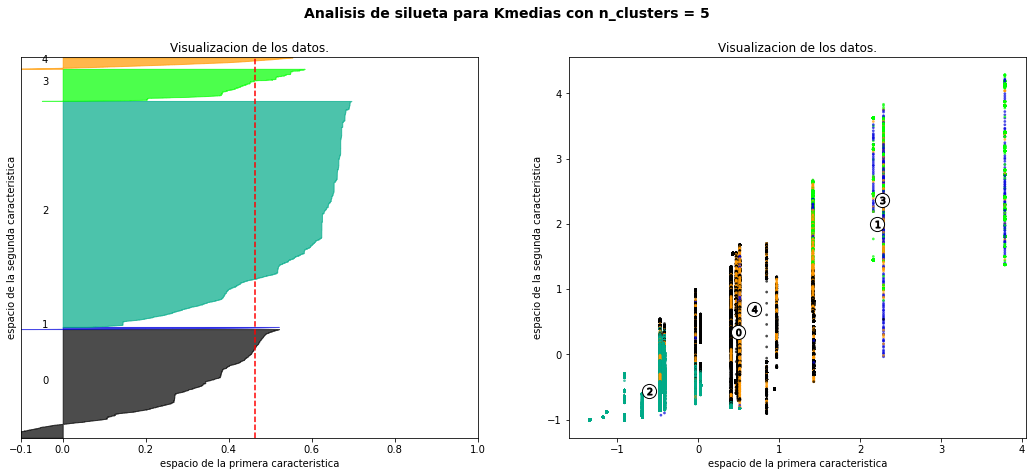

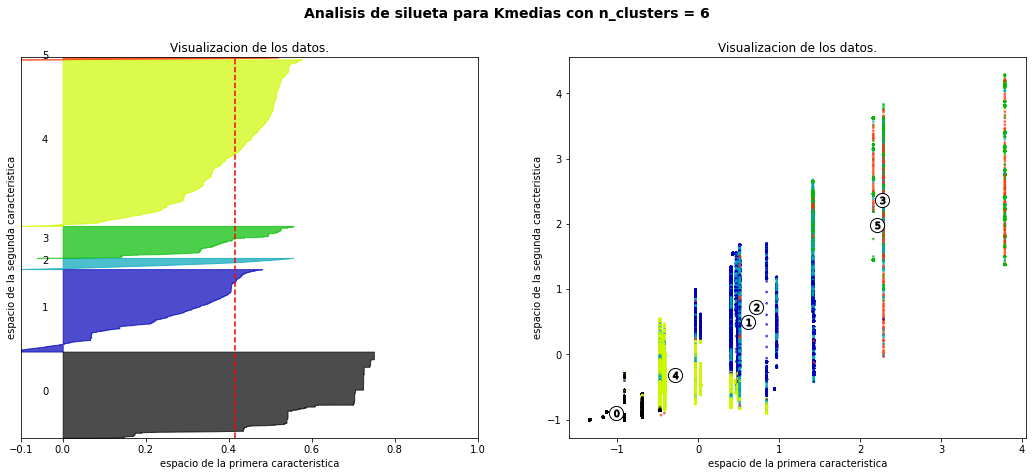

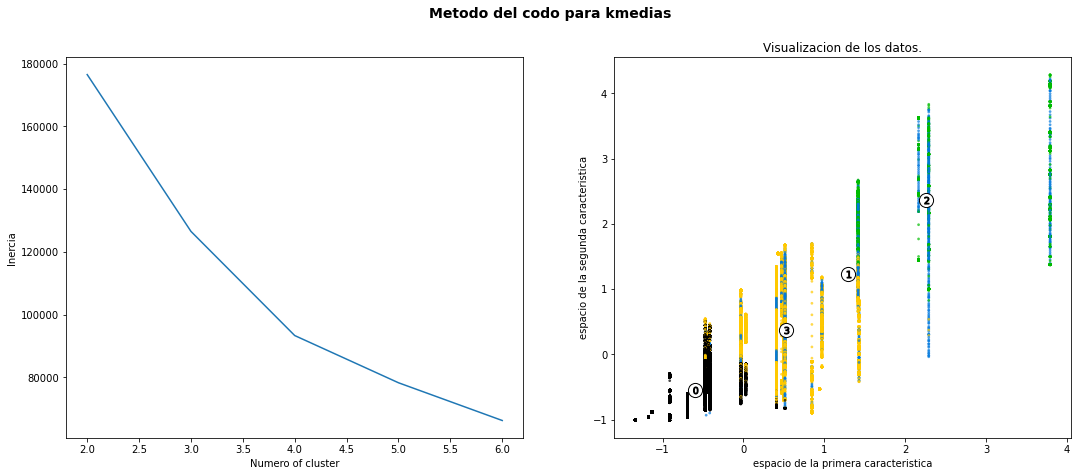

In [54]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

print(__doc__)

X=features

range_n_clusters = [2,3, 4, 5, 6]
sse ={}
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)
    sse[n_clusters] = clusterer.inertia_

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("Para n_clusters =", n_clusters,
          "El silhouette_score promedio es :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("Visualizacion de los datos.")
    ax1.set_xlabel("espacio de la primera caracteristica")
    ax1.set_ylabel("espacio de la segunda caracteristica")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])


    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("Visualizacion de los datos.")
    ax2.set_xlabel("espacio de la primera caracteristica")
    ax2.set_ylabel("espacio de la segunda caracteristica")

    plt.suptitle(("Analisis de silueta para Kmedias "
                  "con n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')
    #plt.savefig("kmeans_%d" % n_clusters, dpi=300)

plt.show()

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(18, 7)
plt.suptitle(("Metodo del codo para kmedias "),
                 fontsize=14, fontweight='bold')
ax1.plot(list(sse.keys()), list(sse.values()))
ax1.set_xlabel("Numero of cluster")
ax1.set_ylabel("Inercia")

clusterer = KMeans(n_clusters=4, random_state=10)
cluster_labels = clusterer.fit_predict(X)
    
colors = cm.nipy_spectral(cluster_labels.astype(float) / 4)
ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,c=colors, edgecolor='k')

# Labeling the clusters
centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
ax2.scatter(centers[:, 0], centers[:, 1], marker='o',c="white", alpha=1, s=200, edgecolor='k')

for i, c in enumerate(centers):
    ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,s=50, edgecolor='k')

ax2.set_title("Visualizacion de los datos.")
ax2.set_xlabel("espacio de la primera caracteristica")
ax2.set_ylabel("espacio de la segunda caracteristica")

#plt.savefig("kmeans_elbow", dpi=300)
plt.show()

In [55]:
# Número de clusters buscado
n_clust = 4

km = KMeans(n_clusters=n_clust, random_state=10)
km.fit(features) #utiliza todas las habilidades: 34 dimensiones

# Recuperacion de etiquetas
clusters = km.labels_

In [56]:
df_fil["kmeans"]=km.labels_

In [57]:
kmean_clusters = go.Scatter(x=features[:,0], y=features[:,1],
                           mode='markers',
                        text=df_fil.loc[:,'id_equipo'],
                           marker=dict(
                                size=5,
                                color = clusters.astype(np.float), #set color equal to a variable
                                colorscale='Portland',
                                showscale=False)
                           )
data=[kmean_clusters]

layout = go.Layout(title="Clustering K means ",titlefont=dict(size=20),
                xaxis=dict(title="Capacidad"),
                yaxis=dict(title="Volumen"),
                autosize=False, width=1000,height=650)

fig = go.Figure(data=data, layout=layout)

plot(fig)

'temp-plot.html'

In [59]:
#df_fil=df_fil.reset_index()

In [60]:
df_fil.kmeans.value_counts()

0    61417
3    28659
2     8637
1     1835
Name: kmeans, dtype: int64

In [61]:
df_fil

,id_equipo,nombre_producto,capacidad,volumen,consumo,industria,volumen_escl,consumo_escl,kmeans
timestamp,,,,,,,,,
2021-01-01 00:00:00,477,VP Nafta,15032,865.65,0,Service Station,0.0575871,0,0
2021-01-01 00:05:00,477,VP Nafta,15032,865.65,0,Service Station,0.0575871,0,0
2021-01-01 00:10:00,477,VP Nafta,15032,865.65,0,Service Station,0.0575871,0,0
2021-01-01 00:15:00,477,VP Nafta,15032,865.65,0,Service Station,0.0575871,0,0
2021-01-01 00:20:00,477,VP Nafta,15032,864.984,0.166504,Service Station,0.0575428,1.10766e-05,0
...,...,...,...,...,...,...,...,...,...
2021-01-07 23:35:00,429,V-Power Nitro,20000,2218.6,0,Service Station,0.11093,0,0
2021-01-07 23:40:00,429,V-Power Nitro,20000,2218.6,0,Service Station,0.11093,0,0
2021-01-07 23:45:00,429,V-Power Nitro,20000,2218.6,0,Service Station,0.11093,0,0


<AxesSubplot:xlabel='industria', ylabel='kmeans'>

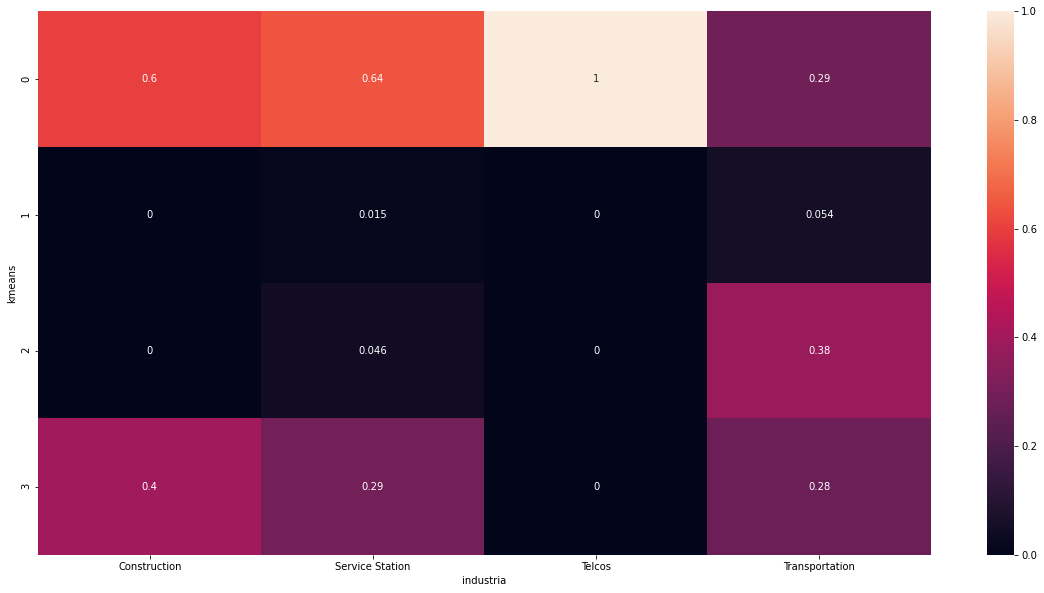

In [62]:
plt.figure(figsize=(20,10))
sns.heatmap(pd.crosstab(df_fil.kmeans, df_fil.industria, normalize='columns'),annot=True)

<AxesSubplot:xlabel='capacidad', ylabel='volumen_escl'>

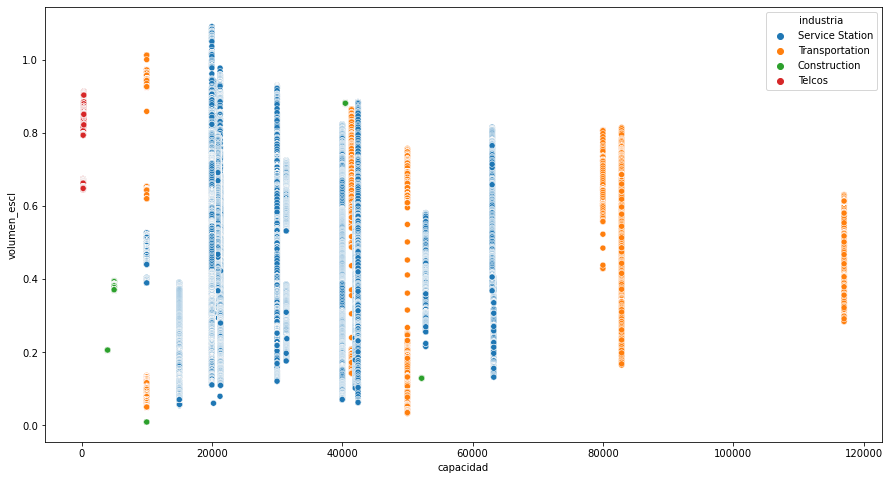

In [63]:
fig = plt.figure(figsize=(15,8))
sns.scatterplot(x=df_fil["capacidad"], y=df_fil["volumen_escl"], hue=df_fil.industria)


<AxesSubplot:xlabel='nombre_producto', ylabel='kmeans'>

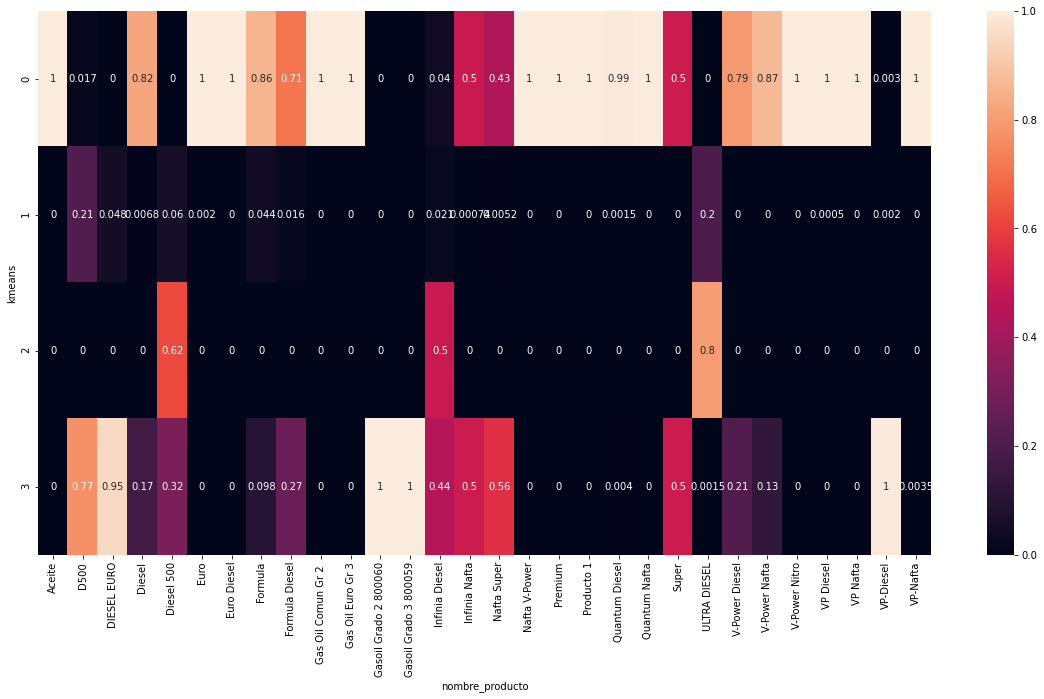

In [64]:
plt.figure(figsize=(20,10))
sns.heatmap(pd.crosstab(df_fil.kmeans, df_fil.nombre_producto, normalize='columns'),annot=True)

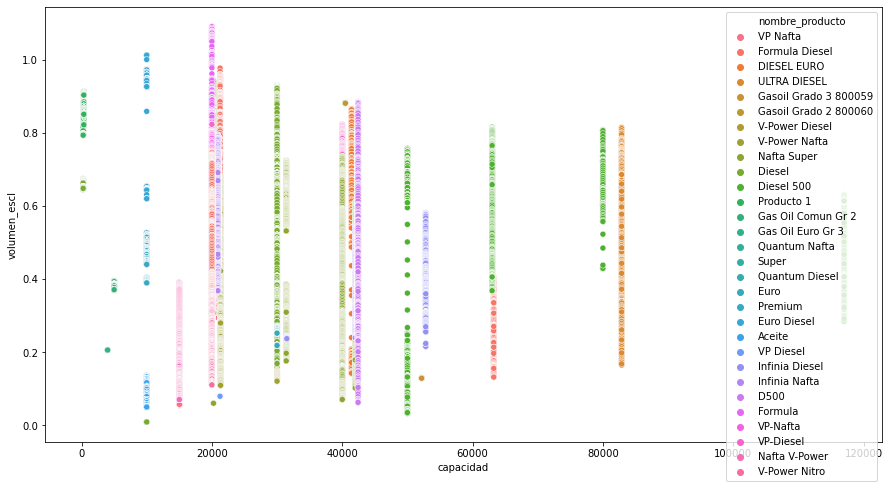

In [65]:
fig = plt.figure(figsize=(15,8))
sns.scatterplot(x=df_fil["capacidad"], y=df_fil["volumen_escl"], hue=df_fil.nombre_producto)
plt.ticklabel_format(style='plain', axis='x') 

### TimeSeriesKMeans

Text(0.5, 1.0, 'Inertia of k-Means versus number of clusters')

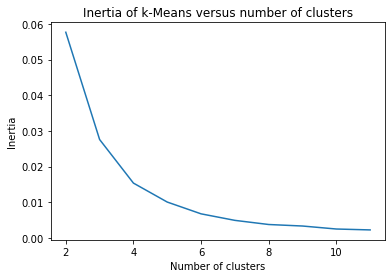

In [95]:
scores = [TimeSeriesKMeans(n_clusters=i).fit(features).inertia_ for i in range(2,12)]

plt.plot(np.arange(2, 12), scores)
plt.xlabel('Number of clusters')
plt.ylabel("Inertia")
plt.title("Inertia of k-Means versus number of clusters")

Automatically created module for IPython interactive environment


ValueError: Found array with dim 3. Estimator expected <= 2.

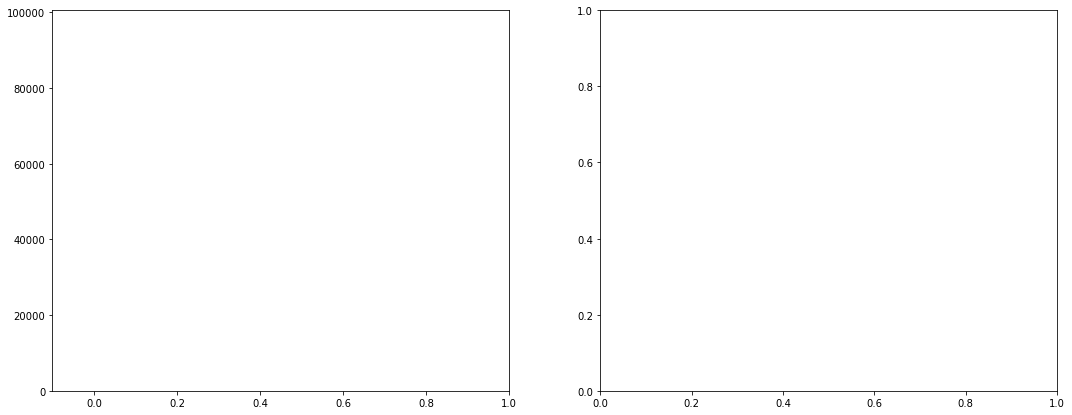

In [103]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

print(__doc__)

X=features

range_n_clusters = [2,3, 4, 5, 6]
sse ={}
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = TimeSeriesKMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)
    sse[n_clusters] = clusterer.inertia_

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("Para n_clusters =", n_clusters,
          "El silhouette_score promedio es :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("Visualizacion de los datos.")
    ax1.set_xlabel("espacio de la primera caracteristica")
    ax1.set_ylabel("espacio de la segunda caracteristica")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])


    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("Visualizacion de los datos.")
    ax2.set_xlabel("espacio de la primera caracteristica")
    ax2.set_ylabel("espacio de la segunda caracteristica")

    plt.suptitle(("Analisis de silueta para Kmedias "
                  "con n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')
    #plt.savefig("kmeans_%d" % n_clusters, dpi=300)

plt.show()

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(18, 7)
plt.suptitle(("Metodo del codo para kmedias "),
                 fontsize=14, fontweight='bold')
ax1.plot(list(sse.keys()), list(sse.values()))
ax1.set_xlabel("Numero of cluster")
ax1.set_ylabel("Inercia")

clusterer = KMeans(n_clusters=4, random_state=10)
cluster_labels = clusterer.fit_predict(X)
    
colors = cm.nipy_spectral(cluster_labels.astype(float) / 4)
ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,c=colors, edgecolor='k')

# Labeling the clusters
centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
ax2.scatter(centers[:, 0], centers[:, 1], marker='o',c="white", alpha=1, s=200, edgecolor='k')

for i, c in enumerate(centers):
    ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,s=50, edgecolor='k')

ax2.set_title("Visualizacion de los datos.")
ax2.set_xlabel("espacio de la primera caracteristica")
ax2.set_ylabel("espacio de la segunda caracteristica")

#plt.savefig("kmeans_elbow", dpi=300)
plt.show()

In [96]:
# Número de clusters buscado
n_clust = 4

km_t = TimeSeriesKMeans(n_clusters=n_clust, random_state=10)
km_t.fit(features) #utiliza todas las habilidades: 34 dimensiones

# Recuperacion de etiquetas
clusters_t = km_t.labels_

In [97]:
df_fil["kmeans_t"]=km_t.labels_

In [98]:
kmean_clusters = go.Scatter(x=features[:,0], y=features[:,1],
                           mode='markers',
                        text=df_fil.loc[:,'id_equipo'],
                           marker=dict(
                                size=5,
                                color = clusters_t.astype(np.float), #set color equal to a variable
                                colorscale='Portland',
                                showscale=False)
                           )
data=[kmean_clusters]

layout = go.Layout(title="Clustering K means ",titlefont=dict(size=20),
                xaxis=dict(title="Capacidad"),
                yaxis=dict(title="Volumen"),
                autosize=False, width=1000,height=650)

fig = go.Figure(data=data, layout=layout)

plot(fig)

'temp-plot.html'

In [99]:
df_fil.kmeans_t.value_counts()

1    33966
2    25103
3    24237
0    17242
Name: kmeans_t, dtype: int64

In [100]:
df_fil

,id_equipo,nombre_producto,capacidad,volumen,consumo,industria,volumen_escl,consumo_escl,kmeans,kmeans_t,MeanShift,labels_kshape
timestamp,,,,,,,,,,,,
2021-01-01 00:00:00,477,VP Nafta,15032,865.65,0,Service Station,0.0575871,0,0,3,0,3
2021-01-01 00:05:00,477,VP Nafta,15032,865.65,0,Service Station,0.0575871,0,0,3,0,3
2021-01-01 00:10:00,477,VP Nafta,15032,865.65,0,Service Station,0.0575871,0,0,3,0,3
2021-01-01 00:15:00,477,VP Nafta,15032,865.65,0,Service Station,0.0575871,0,0,3,0,3
2021-01-01 00:20:00,477,VP Nafta,15032,864.984,0.166504,Service Station,0.0575428,1.10766e-05,0,3,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-01-07 23:35:00,429,V-Power Nitro,20000,2218.6,0,Service Station,0.11093,0,0,3,0,3
2021-01-07 23:40:00,429,V-Power Nitro,20000,2218.6,0,Service Station,0.11093,0,0,3,0,3
2021-01-07 23:45:00,429,V-Power Nitro,20000,2218.6,0,Service Station,0.11093,0,0,3,0,3


<AxesSubplot:xlabel='industria', ylabel='kmeans_t'>

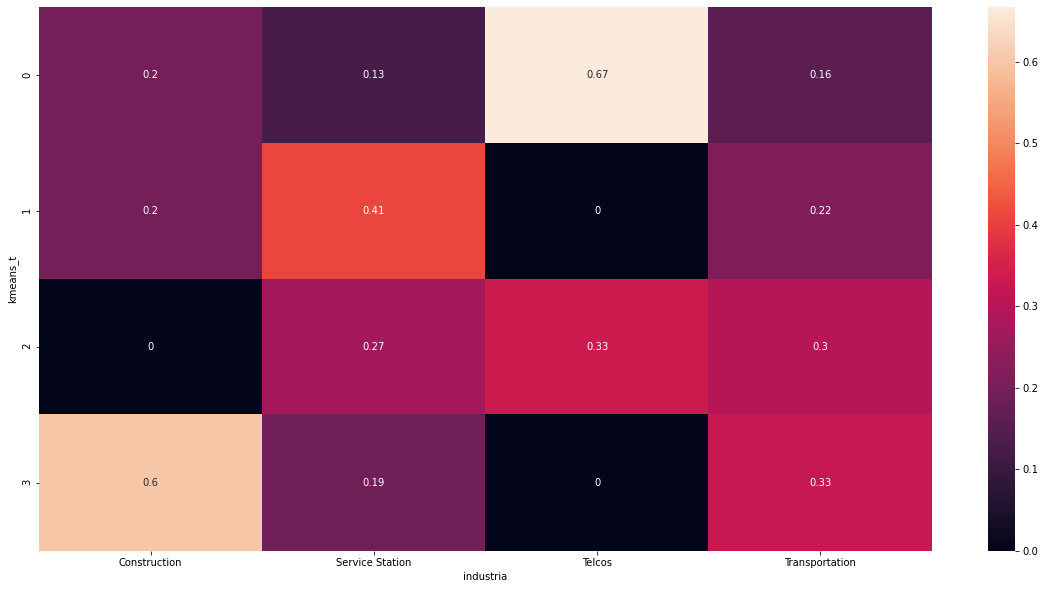

In [101]:
plt.figure(figsize=(20,10))
sns.heatmap(pd.crosstab(df_fil.kmeans_t, df_fil.industria, normalize='columns'),annot=True)

<AxesSubplot:xlabel='nombre_producto', ylabel='kmeans_t'>

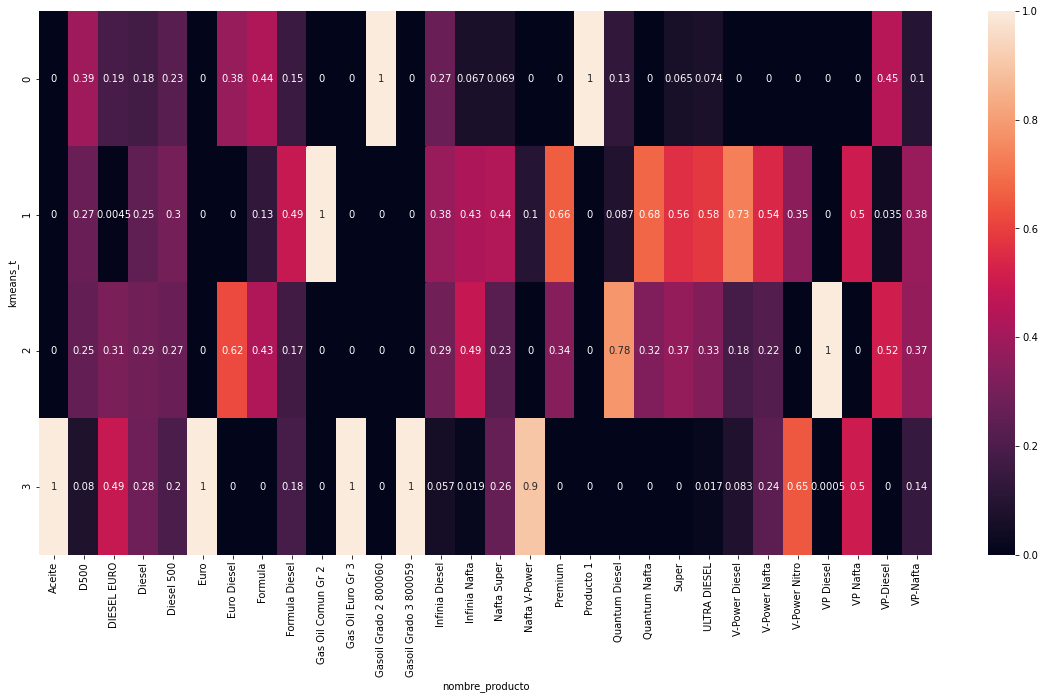

In [102]:
plt.figure(figsize=(20,10))
sns.heatmap(pd.crosstab(df_fil.kmeans_t, df_fil.nombre_producto, normalize='columns'),annot=True)

### MeanShift

In [75]:
ms = MeanShift(bin_seeding=True)

ms.fit(features)

clusters2 = ms.labels_
cluster_centers = ms.cluster_centers_

labels_unique = np.unique(clusters2)
n_clusters_ = len(labels_unique)

print("Cantidad de clusters encontrados por Mean Shift : %d" % n_clusters_)

Cantidad de clusters encontrados por Mean Shift : 30


In [76]:
df_fil['MeanShift'] = ms.labels_ #clusters2

In [77]:
kmean_clusters = go.Scatter(x=features[:,0], y=features[:,1],
                           mode='markers',
                        text=df_fil.loc[:,'id_equipo'],
                           marker=dict(
                                size=5,
                                color = clusters2.astype(np.float), #set color equal to a variable
                                colorscale='Portland',
                                showscale=False)
                           )
data=[kmean_clusters]

layout = go.Layout(title="Clustering K means ",titlefont=dict(size=20),
                xaxis=dict(title="Capacidad"),
                yaxis=dict(title="Volumen"),
                autosize=False, width=1000,height=650)

fig = go.Figure(data=data, layout=layout)

plot(fig)

'temp-plot.html'

In [78]:
df_fil.MeanShift.value_counts()

0     80583
1     15517
2      1852
5       804
3       771
8       407
4       255
6       105
7        51
11       41
12       38
9        28
10       27
13       14
14       11
17        8
20        7
15        4
16        4
18        4
19        3
22        3
21        2
24        2
25        2
28        1
23        1
26        1
27        1
29        1
Name: MeanShift, dtype: int64

<AxesSubplot:xlabel='industria', ylabel='MeanShift'>

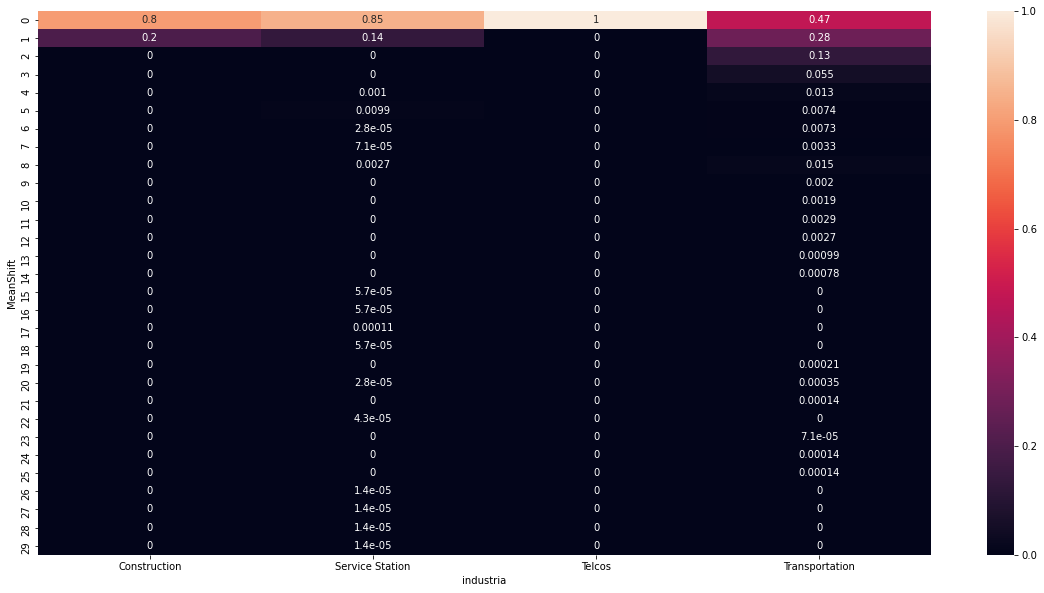

In [79]:
plt.figure(figsize=(20,10))
sns.heatmap(pd.crosstab(df_fil.MeanShift, df_fil.industria, normalize='columns'),annot=True)

<AxesSubplot:xlabel='nombre_producto', ylabel='MeanShift'>

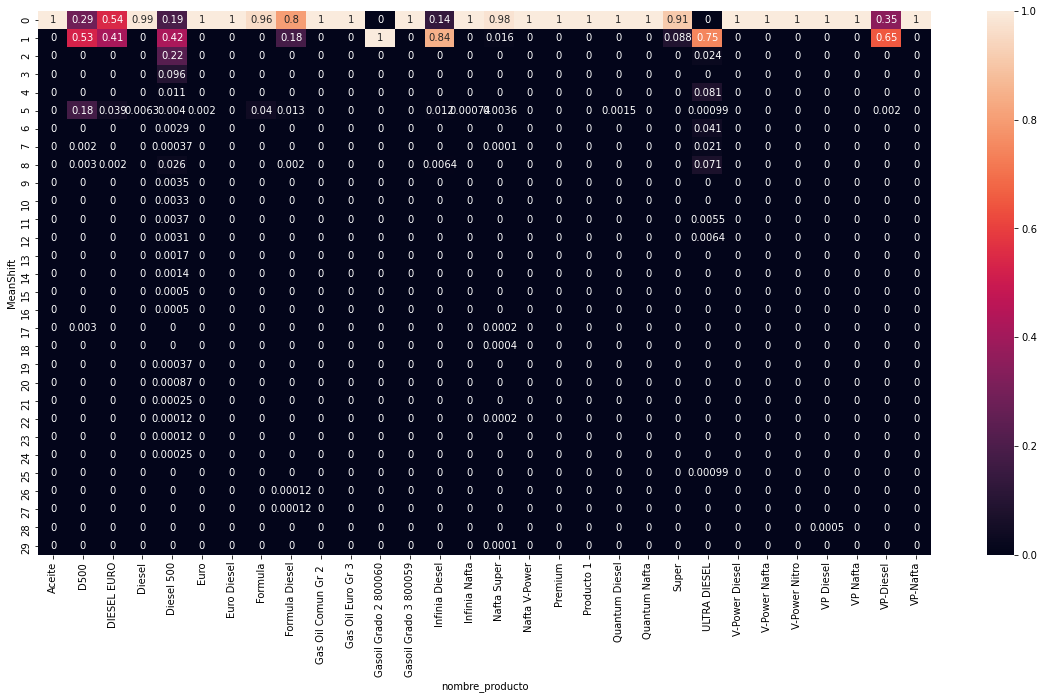

In [80]:
plt.figure(figsize=(20,10))
sns.heatmap(pd.crosstab(df_fil.MeanShift, df_fil.nombre_producto, normalize='columns'),annot=True)

In [81]:
metrics.silhouette_score(features, clusters2)

0.5307184250868816

### KShape

Text(0.5, 1.0, 'Inertia of k-Means versus number of clusters')

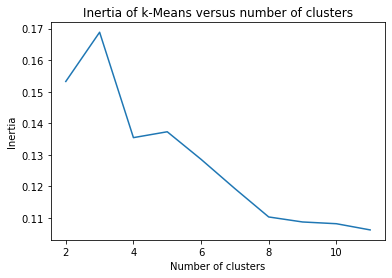

In [82]:
scores = [KShape(n_clusters=i).fit(features).inertia_ for i in range(2,12)]

plt.plot(np.arange(2, 12), scores)
plt.xlabel('Number of clusters')
plt.ylabel("Inertia")
plt.title("Inertia of k-Means versus number of clusters")

Automatically created module for IPython interactive environment
Para n_clusters = 2 El silhouette_score promedio es : -0.07478740066808233


KeyboardInterrupt: 

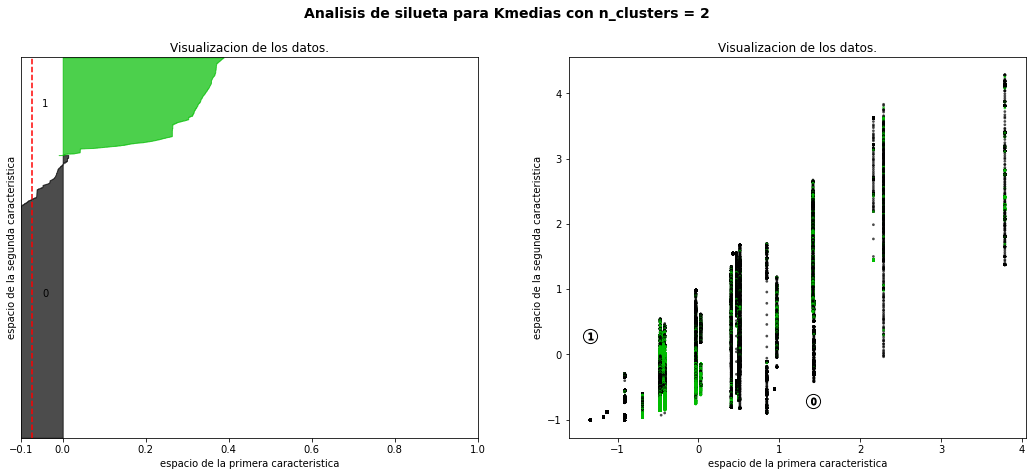

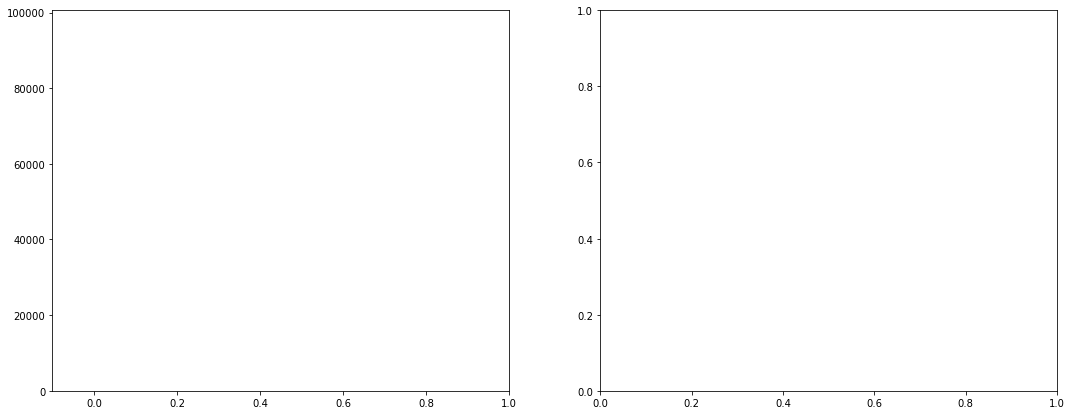

In [90]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

print(__doc__)

X=features

range_n_clusters = [2,3, 4, 5, 6]
sse ={}
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KShape(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)
    sse[n_clusters] = clusterer.inertia_

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("Para n_clusters =", n_clusters,
          "El silhouette_score promedio es :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("Visualizacion de los datos.")
    ax1.set_xlabel("espacio de la primera caracteristica")
    ax1.set_ylabel("espacio de la segunda caracteristica")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])


    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("Visualizacion de los datos.")
    ax2.set_xlabel("espacio de la primera caracteristica")
    ax2.set_ylabel("espacio de la segunda caracteristica")

    plt.suptitle(("Analisis de silueta para Kmedias "
                  "con n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')
    #plt.savefig("kmeans_%d" % n_clusters, dpi=300)

plt.show()

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(18, 7)
plt.suptitle(("Metodo del codo para kmedias "),
                 fontsize=14, fontweight='bold')
ax1.plot(list(sse.keys()), list(sse.values()))
ax1.set_xlabel("Numero of cluster")
ax1.set_ylabel("Inercia")

clusterer = KMeans(n_clusters=4, random_state=10)
cluster_labels = clusterer.fit_predict(X)
    
colors = cm.nipy_spectral(cluster_labels.astype(float) / 4)
ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,c=colors, edgecolor='k')

# Labeling the clusters
centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
ax2.scatter(centers[:, 0], centers[:, 1], marker='o',c="white", alpha=1, s=200, edgecolor='k')

for i, c in enumerate(centers):
    ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,s=50, edgecolor='k')

ax2.set_title("Visualizacion de los datos.")
ax2.set_xlabel("espacio de la primera caracteristica")
ax2.set_ylabel("espacio de la segunda caracteristica")

#plt.savefig("kmeans_elbow", dpi=300)
plt.show()

In [83]:
ks = KShape(n_clusters=4, 
            verbose=True,
            n_init=10).fit(features)
labels_kshape = ks.labels_

Init 1
0.186 --> 0.116 --> 0.131 --> 
Init 2
0.159 --> 0.119 --> 0.121 --> 
Init 3
0.198 --> 0.114 --> 0.131 --> 
Init 4
0.144 --> 0.198 --> 
Init 5
0.136 --> 0.134 --> 0.130 --> 0.133 --> 
Init 6
0.144 --> 0.199 --> 
Init 7
0.140 --> 0.137 --> 0.137 --> 
Init 8
0.143 --> 0.184 --> 
Init 9
0.130 --> 0.149 --> 
Init 10
0.146 --> 0.136 --> 0.137 --> 


In [84]:
df_fil["labels_kshape"]=ks.labels_

In [85]:
kmean_clusters = go.Scatter(x=features[:,0], y=features[:,1],
                           mode='markers',
                        text=df_fil.loc[:,'id_equipo'],
                           marker=dict(
                                size=5,
                                color = labels_kshape.astype(np.float), #set color equal to a variable
                                colorscale='Portland',
                                showscale=False)
                           )
data=[kmean_clusters]

layout = go.Layout(title="Clustering K means ",titlefont=dict(size=20),
                xaxis=dict(title="Capacidad"),
                yaxis=dict(title="Volumen"),
                autosize=False, width=1000,height=650)

fig = go.Figure(data=data, layout=layout)

plot(fig)

'temp-plot.html'

In [86]:
df_fil.labels_kshape.value_counts()

3    43128
0    40883
1    12672
2     3865
Name: labels_kshape, dtype: int64

In [87]:
df_fil

,id_equipo,nombre_producto,capacidad,volumen,consumo,industria,volumen_escl,consumo_escl,kmeans,kmeans_t,MeanShift,labels_kshape
timestamp,,,,,,,,,,,,
2021-01-01 00:00:00,477,VP Nafta,15032,865.65,0,Service Station,0.0575871,0,0,1,0,3
2021-01-01 00:05:00,477,VP Nafta,15032,865.65,0,Service Station,0.0575871,0,0,1,0,3
2021-01-01 00:10:00,477,VP Nafta,15032,865.65,0,Service Station,0.0575871,0,0,1,0,3
2021-01-01 00:15:00,477,VP Nafta,15032,865.65,0,Service Station,0.0575871,0,0,1,0,3
2021-01-01 00:20:00,477,VP Nafta,15032,864.984,0.166504,Service Station,0.0575428,1.10766e-05,0,1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-01-07 23:35:00,429,V-Power Nitro,20000,2218.6,0,Service Station,0.11093,0,0,1,0,3
2021-01-07 23:40:00,429,V-Power Nitro,20000,2218.6,0,Service Station,0.11093,0,0,1,0,3
2021-01-07 23:45:00,429,V-Power Nitro,20000,2218.6,0,Service Station,0.11093,0,0,1,0,3


<AxesSubplot:xlabel='industria', ylabel='labels_kshape'>

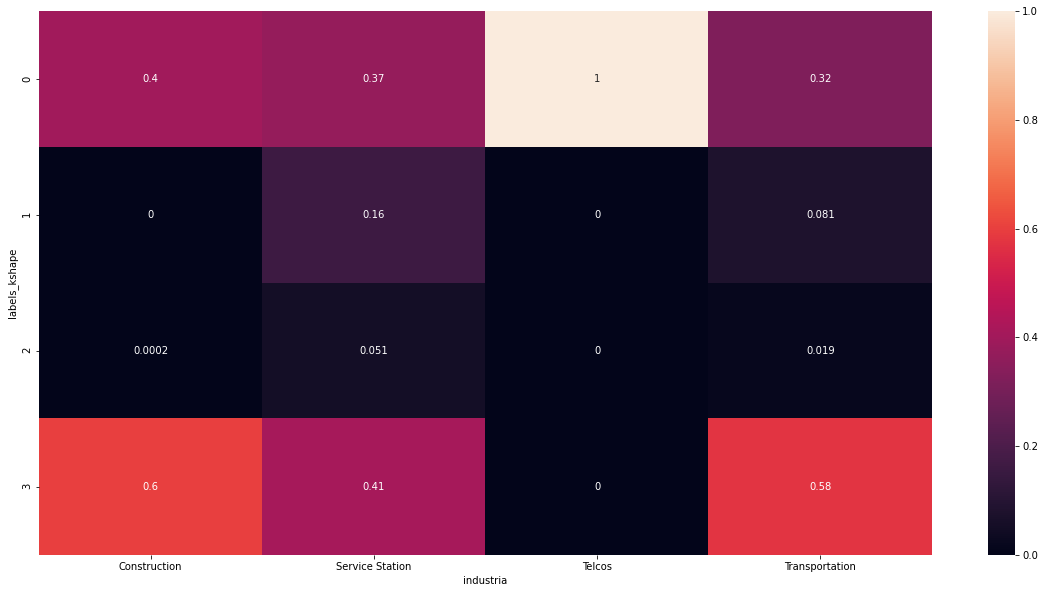

In [88]:
plt.figure(figsize=(20,10))
sns.heatmap(pd.crosstab(df_fil.labels_kshape, df_fil.industria, normalize='columns'),annot=True)

<AxesSubplot:xlabel='nombre_producto', ylabel='labels_kshape'>

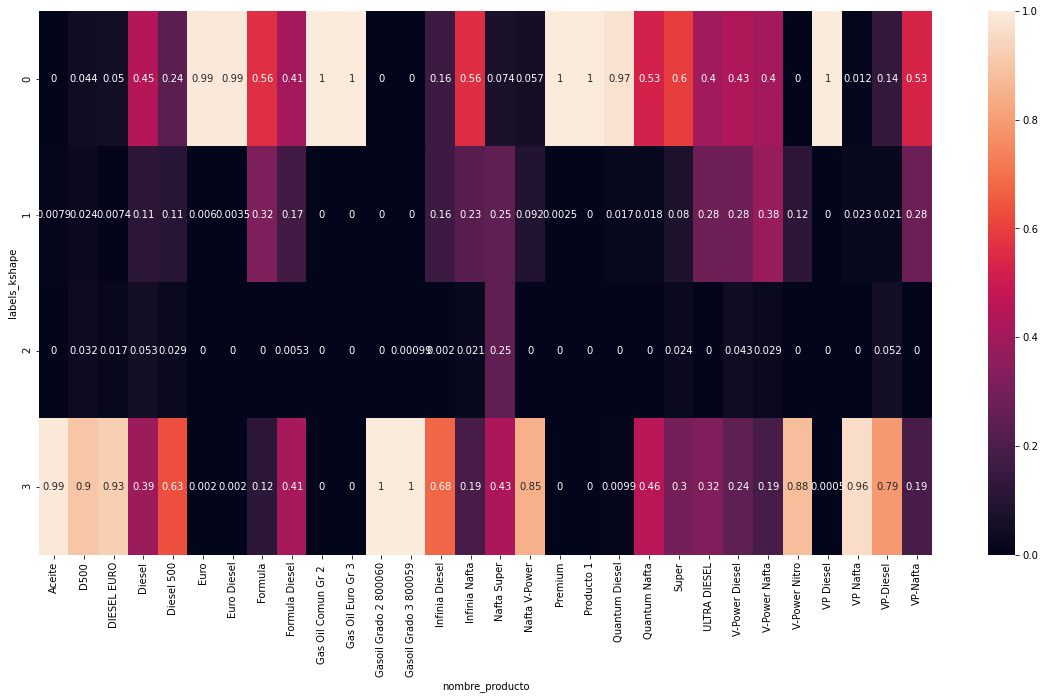

In [89]:
plt.figure(figsize=(20,10))
sns.heatmap(pd.crosstab(df_fil.labels_kshape, df_fil.nombre_producto, normalize='columns'),annot=True)